Missing values:
Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64


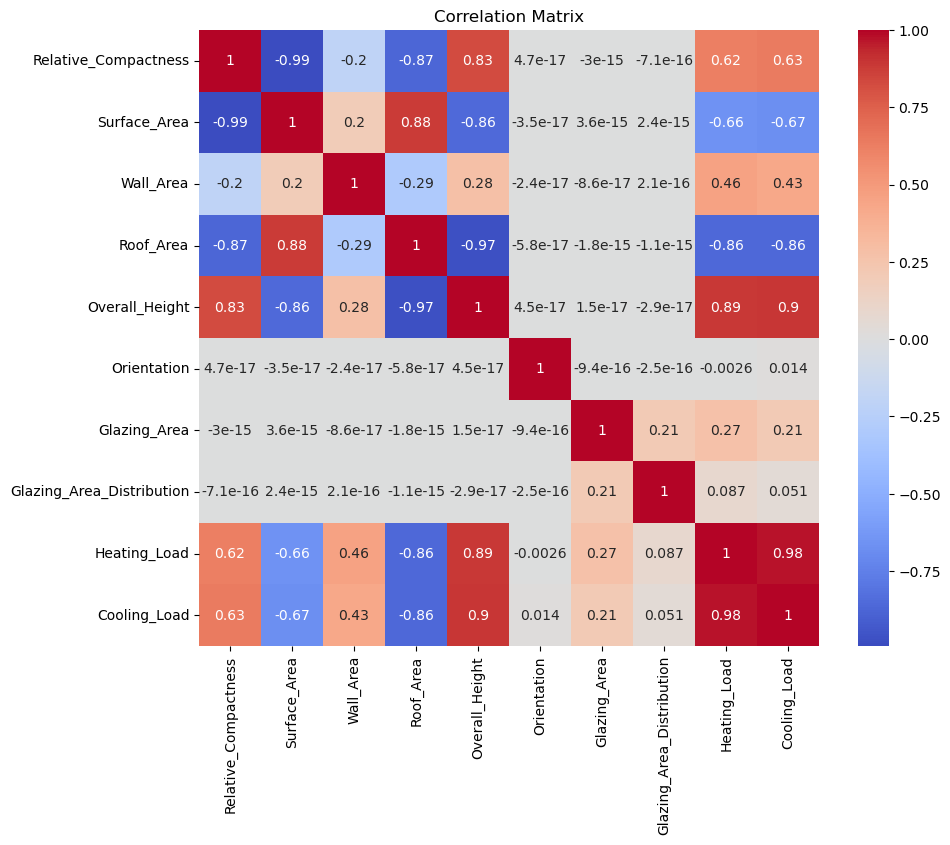

Manual Linear Regression Performance:
R2 Score: 0.9208
MSE: 8.2576
RMSE: 2.8736

Sklearn Linear Regression Performance:
R2 Score: 0.9205
MSE: 8.2908
RMSE: 2.8794

Ridge Regression Performance:
R2 Score: 0.9201
MSE: 8.3266
RMSE: 2.8856

Lasso Regression Performance:
R2 Score: 0.9196
MSE: 8.3809
RMSE: 2.8950



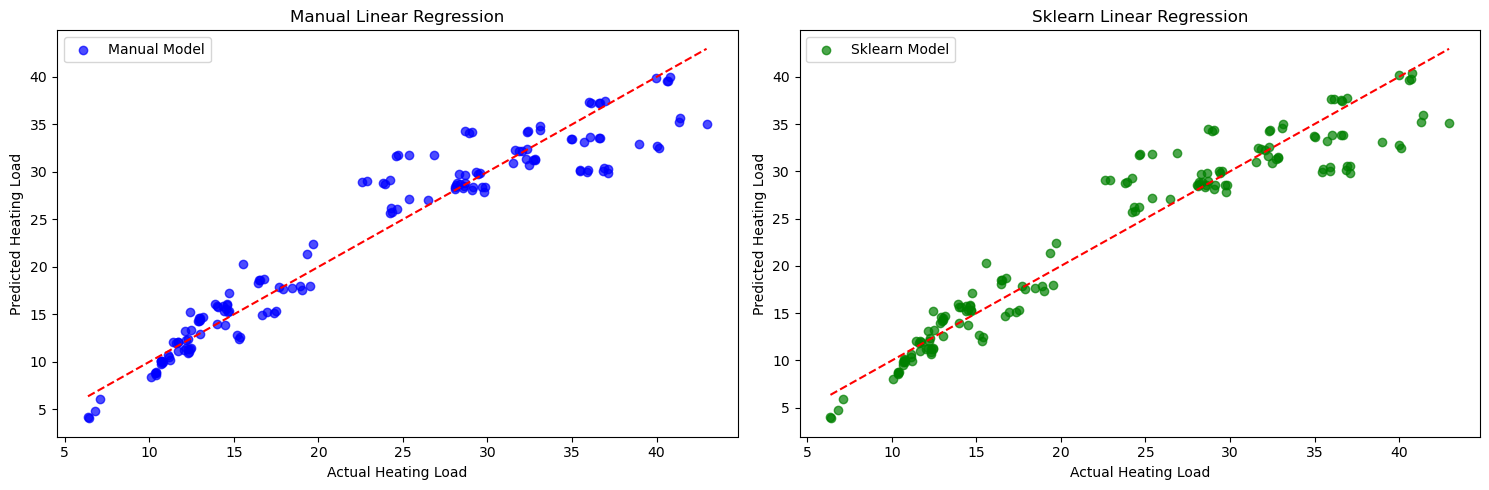

Feature Importance (Lasso Regression):
Overall_Height                 7.793670
Relative_Compactness          -4.945018
Roof_Area                     -4.659785
Glazing_Area                   2.333258
Glazing_Area_Distribution_2    1.501121
Glazing_Area_Distribution_3    1.454386
Glazing_Area_Distribution_1    1.451486
Glazing_Area_Distribution_5    1.436707
Glazing_Area_Distribution_4    1.310820
Surface_Area                  -0.765160
Wall_Area                      0.176174
Orientation_5                 -0.062363
Orientation_3                 -0.023599
Orientation_4                 -0.000000
dtype: float64

Suggestion for Energy Efficiency:
 Increase insulation for features with high coefficients (e.g., walls, roof).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(data_url)

df.columns = [
    "Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area",
    "Overall_Height", "Orientation", "Glazing_Area", "Glazing_Area_Distribution",
    "Heating_Load", "Cooling_Load"
]

# Check for Missing Values
print("Missing values:")
print(df.isnull().sum())

# Correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# target and feature
X = df.drop(columns=["Heating_Load", "Cooling_Load"])
y = df["Heating_Load"]


X = pd.get_dummies(X, columns=["Orientation", "Glazing_Area_Distribution"], drop_first=True)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Implement Multivariate Linear Regression
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train] 
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

weights = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

# Predictions 
y_pred_manual = X_test_bias @ weights

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluation
def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} Performance:")
    print(f"R2 Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}\n")
    return r2, mse, rmse

# Evaluate Models
evaluate_model(y_test, y_pred_manual, "Manual Linear Regression")
evaluate_model(y_test, y_pred_lr, "Sklearn Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

# Plot Predicted vs Actual Values
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_manual, alpha=0.7, color="blue", label="Manual Model")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Manual Linear Regression")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lr, alpha=0.7, color="green", label="Sklearn Model")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Sklearn Linear Regression")
plt.legend()

plt.tight_layout()
plt.show()

# Feature Importance 
feature_importance = pd.Series(lasso.coef_, index=X.columns)
feature_importance = feature_importance.sort_values(key=abs, ascending=False)
print("Feature Importance (Lasso Regression):")
print(feature_importance)

# Suggestion for Energy Efficiency Improvement
print("\nSuggestion for Energy Efficiency:")
print(" Focus on optimizing features like Wall Area, Roof Area, and Overall Height, as they have a strong correlation with Heating Load.")
print(" Adjust glazing area and distribution to balance heat gain and loss effectively.")
print(" Consider building orientation to maximize solar gain in colder climates")
